# NOAA Lightning Analysis

## Introduction

In this notebook, I will analyze lightning strike data collected by the National Oceanic and Atmospheric Administration (NOAA). The dataset covers multiple years, including data from 1987 to 2020, as well as specific analyses for the years 2016, 2017, and 2018. My goal is to explore patterns, trends, and anomalies in lightning activity across different timeframes and geographic locations.

## Overview

To achieve this, I will perform various analyses, including:

- Calculating the total number of lightning strikes per month and visualizing them on bar graphs.
- Aggregating weekly and quarterly lightning strike data and identifying seasonal trends.
- Finding the locations with the highest number of lightning strikes in a single day and those with the most strike days.
- Examining whether certain days of the week had more lightning strikes than others.
- Merging datasets to ensure completeness and investigating missing data.
- Assigning monthly lightning strike counts to severity categories and visualizing the data using heatmaps.
- Validating data quality by checking for null values, missing dates, and ensuring geographic accuracy.
- Identifying yearly lightning strike outliers and visualizing trends using scatterplots.

By conducting these analyses, I aim to gain insights into lightning strike behavior, identify patterns, and validate the reliability of the dataset for further research.


## Dataset Structure

### Lightning Strike Datasets
These datasets contain information about lightning strikes recorded by the National Oceanic and Atmospheric Administration (NOAA). Across the 13 datasets, various fields capture details about strike locations, dates, and other relevant geographical and statistical information. While some fields are common across multiple datasets, others are unique to specific datasets. Below is a description of the key fields found in these datasets:

- **date**: The date when the lightning strike was recorded.
- **year**: The year in which the lightning strike occurred.
- **number_of_strikes**: The total number of lightning strikes recorded on the given date.
- **center_point_geom**: The geometric center point of the lightning strike in the format `POINT(longitude latitude)`.
- **longitude**: The longitude coordinate of the lightning strike location.
- **latitude**: The latitude coordinate of the lightning strike location.
- **zip_code**: The postal zip code of the area where the lightning strike was recorded.
- **city**: The name of the city where the lightning strike occurred.
- **state**: The full name of the state where the lightning strike was recorded.
- **state_code**: The abbreviated state code (e.g., 'AR' for Arkansas).
- **count_lightning**: The cumulative count of lightning strikes recorded for the specified location and time period.


## EDA using basic data functions with Python

I will use pandas to examine 2018 lightning strike data collected by the National Oceanic and Atmospheric Administration (NOAA). My goal is to calculate the total number of strikes for each month and visualize this information using a bar graph.

### Import packages and libraries


Before I begin, I need to import all the required libraries and extensions. I will use pandas, numpy, and datetime for data operations, and matplotlib and seaborn for visualization.


In [3]:
import pandas as pd
import numpy as np
import datetime as dt
import seaborn as sns
import matplotlib.pyplot as plt

Next, I will load the dataset and display a sample of the data.


In [4]:
df = pd.read_csv(r'C:\Users\saswa\Documents\GitHub\NOAA-Lightning-Analysis\Data\eda_using_basic_data_functions_in_python_dataset1.csv')


### Basic Exploration
To understand the structure of the dataset, I will check its size and display the first 10 rows.

In [5]:
df.size
df.head(10)

,date,number_of_strikes,center_point_geom
0,2018-01-03,194,POINT(-75 27)
1,2018-01-03,41,POINT(-78.4 29)
2,2018-01-03,33,POINT(-73.9 27)
3,2018-01-03,38,POINT(-73.8 27)
4,2018-01-03,92,POINT(-79 28)
5,2018-01-03,119,POINT(-78 28)
6,2018-01-03,35,POINT(-79.3 28)
7,2018-01-03,60,POINT(-79.1 28)
8,2018-01-03,41,POINT(-78.7 28)
9,2018-01-03,119,POINT(-78.6 28)


The data is structured with one row per day along with the geometric location of the strike. A quick way to determine how many rows and columns exist is by using `df.shape`.


df.shape


This dataset contains 3,401,012 rows and 3 columns.


In [6]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3401012 entries, 0 to 3401011
Data columns (total 3 columns):
 #   Column             Dtype 
---  ------             ----- 
 0   date               object
 1   number_of_strikes  int64 
 2   center_point_geom  object
dtypes: int64(1), object(2)
memory usage: 77.8+ MB


I can see that the `date` column is an object type rather than a datetime type, which means it is stored as a string. To perform operations on dates, I need to convert it to a datetime format.


In [7]:
df['date'] = pd.to_datetime(df['date'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3401012 entries, 0 to 3401011
Data columns (total 3 columns):
 #   Column             Dtype         
---  ------             -----         
 0   date               datetime64[ns]
 1   number_of_strikes  int64         
 2   center_point_geom  object        
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 77.8+ MB


### Find the Days with the Most Strikes
To understand the highest data points, I will calculate the top 10 days in 2018 with the most lightning strikes.


In [8]:
df.groupby(['date']).sum().sort_values('number_of_strikes', ascending=False).head(10)


,number_of_strikes,center_point_geom
date,,
2018-08-29,1070457,POINT(-85.7 29.1)POINT(-85.6 29.1)POINT(-84.5 ...
2018-08-17,969774,POINT(-80.6 20.3)POINT(-80.5 20.3)POINT(-80.4 ...
2018-08-28,917199,POINT(-108.2 28)POINT(-108.1 28)POINT(-108 28)...
2018-08-27,824589,POINT(-109 24.8)POINT(-108 24.8)POINT(-88.1 24...
2018-08-30,802170,POINT(-75.7 19)POINT(-75.6 19)POINT(-78 20)POI...
2018-08-19,786225,POINT(-73 35)POINT(-103 35)POINT(-101 35)POINT...
2018-08-18,741180,POINT(-110.7 46)POINT(-104.9 46)POINT(-115.1 4...
2018-08-16,734475,POINT(-97 20)POINT(-77 20)POINT(-96.9 20)POINT...
2018-08-31,723624,POINT(-95.2 48.4)POINT(-96 48.1)POINT(-96.1 48...


It's important to use `sum()` instead of `count()` here. Using `count()` would return the number of occurrences of each date rather than the total strikes.


### Extract Month Data
Now, I will extract the month from the `date` column and store it in a new column called `month`.


In [9]:
df['month'] = df['date'].dt.month
df.head()

,date,number_of_strikes,center_point_geom,month
0,2018-01-03,194,POINT(-75 27),1
1,2018-01-03,41,POINT(-78.4 29),1
2,2018-01-03,33,POINT(-73.9 27),1
3,2018-01-03,38,POINT(-73.8 27),1
4,2018-01-03,92,POINT(-79 28),1


### Calculate the Number of Strikes per Month
I will now aggregate the total number of strikes per month and sort the results in descending order.


In [10]:
df.groupby(['month'])['number_of_strikes'].sum().sort_values(ascending=False).head(12)


month
8     15525255
7      8320400
6      6445083
5      4166726
9      3018336
2      2071315
4      1524339
10     1093962
1       860045
3       854168
11      409263
12      312097
Name: number_of_strikes, dtype: int64

### Convert Month Numbers to Text
To make the data more readable, I will convert the month numbers into text.

In [11]:
df['month_txt'] = df['date'].dt.month_name().str.slice(stop=3)
df.head()

,date,number_of_strikes,center_point_geom,month,month_txt
0,2018-01-03,194,POINT(-75 27),1,Jan
1,2018-01-03,41,POINT(-78.4 29),1,Jan
2,2018-01-03,33,POINT(-73.9 27),1,Jan
3,2018-01-03,38,POINT(-73.8 27),1,Jan
4,2018-01-03,92,POINT(-79 28),1,Jan


### Create a New DataFrame for Visualization
I will now create a new dataframe `df_by_month` to structure the data for visualization.

In [12]:
df_by_month = (
    df.groupby(['month', 'month_txt'])['number_of_strikes']
    .sum()
    .reset_index()
    .sort_values('month', ascending=True)
)

df_by_month

,month,month_txt,number_of_strikes
0,1,Jan,860045
1,2,Feb,2071315
2,3,Mar,854168
3,4,Apr,1524339
4,5,May,4166726
5,6,Jun,6445083
6,7,Jul,8320400
7,8,Aug,15525255
8,9,Sep,3018336
9,10,Oct,1093962


Now, I will create a bar chart to visualize the total number of strikes per month.


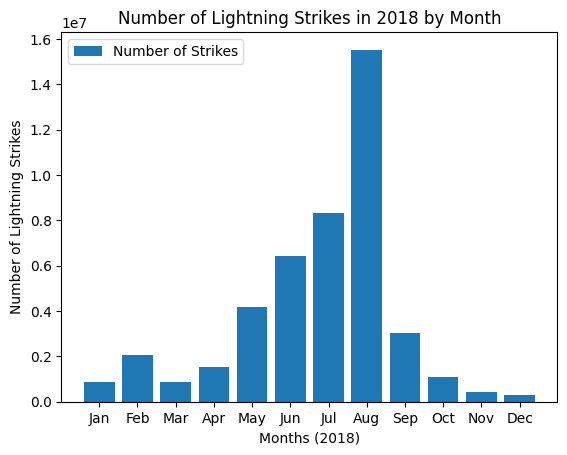

In [13]:
plt.bar(x=df_by_month['month_txt'], height=df_by_month['number_of_strikes'], label='Number of Strikes')
plt.xlabel('Months (2018)')
plt.ylabel('Number of Lightning Strikes')
plt.title('Number of Lightning Strikes in 2018 by Month')
plt.legend()
plt.show()

### Load the Second Dataset

I will now load the second dataset, which contains lightning strike data along with additional location information like zip_code, city, and state.

In [14]:
df2= pd.read_csv(r'C:\Users\saswa\Documents\GitHub\NOAA-Lightning-Analysis\Data\eda_using_basic_data_functions_in_python_dataset2.csv')


In [15]:
print(df2.sample())

        zip_code                          city    state state_code   latitude  \
280972     31063  Dooling town, Montezuma city  Georgia         GA  32.288966   

        longitude  count_lightning center_point_geom  
280972  -83.96326               23   POINT(-84 32.4)  


### Basic Exploration of Dataset 2

To understand the structure of the second dataset, I will check its size and display a sample of the data.

In [16]:
print("Dataset Size:", df2.size)
print("Dataset Shape:", df2.shape)
print(df2.info())

Dataset Size: 13536808
Dataset Shape: (1692101, 8)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1692101 entries, 0 to 1692100
Data columns (total 8 columns):
 #   Column             Dtype  
---  ------             -----  
 0   zip_code           int64  
 1   city               object 
 2   state              object 
 3   state_code         object 
 4   latitude           float64
 5   longitude          float64
 6   count_lightning    int64  
 7   center_point_geom  object 
dtypes: float64(2), int64(2), object(4)
memory usage: 103.3+ MB
None


The dataset contains multiple columns, including zip_code, city, state, and count_lightning. We will also check for any missing values in the dataset.

In [17]:
print(df2.isnull().sum())


zip_code             0
city                 0
state                0
state_code           0
latitude             0
longitude            0
count_lightning      0
center_point_geom    0
dtype: int64


### Group Lightning Strikes by State

I will group the dataset by the state column and calculate the total number of lightning strikes in each state. Then, I will sort the results in descending order.

In [18]:
state_wise_lightning = df2.groupby('state')['count_lightning'].sum().reset_index().sort_values(by='count_lightning', ascending=False)


### Find the Top 10 Locations with the Highest Lightning Strikes

Next, I will sort the dataset by the count_lightning column and display the top 10 locations with the highest number of lightning strikes, including zip_code, city, and state.

In [19]:
top_10_locations = df2[['zip_code', 'city', 'state', 'count_lightning']].sort_values(by='count_lightning', ascending=False).head(10)
top_10_locations

,zip_code,city,state,count_lightning
0,72031,Clinton city,Arkansas,2211
1,74063,"Sand Springs city, Sapulpa city, Lotsee town, ...",Oklahoma,2142
2,63876,Senath city,Missouri,2061
3,72315,"Blytheville city, Victoria town, Dell town, Go...",Arkansas,2031
4,74063,"Sand Springs city, Sapulpa city, Lotsee town, ...",Oklahoma,1902
5,39421,Bassfield town,Mississippi,1878
6,78011,Charlotte city,Texas,1833
7,63855,"Hornersville city, Rives town",Missouri,1767
8,78113,Falls City city,Texas,1741
9,78026,"Christine town, Pleasanton city, Jourdanton city",Texas,1655


### Plot the Top 10 Locations with the Highest Number of Lightning Strikes


Now, I will create a horizontal bar chart to visualize the top 10 locations with the highest number of lightning strikes. The city column will be on the y-axis, and the number of lightning strikes will be represented on the x-axis.

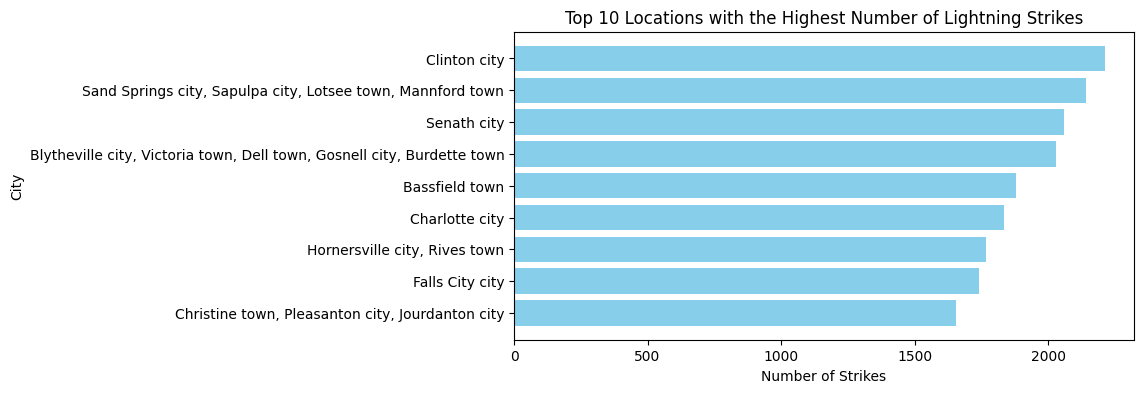

In [20]:
# Plotting the bar chart
plt.figure(figsize=(8,4))
plt.barh(top_10_locations['city'], top_10_locations['count_lightning'], color='skyblue')
plt.xlabel('Number of Strikes')
plt.ylabel('City')
plt.title('Top 10 Locations with the Highest Number of Lightning Strikes')
plt.gca().invert_yaxis()  # Invert y-axis to show the highest value at the top
plt.show()


## Date String Manipulations with Python

### Introduction

In this section, I will manipulate date strings in Python using lightning strike data from the National Oceanic and Atmospheric Association (NOAA) for the years 2016–2018. I will calculate weekly and quarterly sums of lightning strikes, perform data aggregations, and visualize the results through bar graphs to analyze the frequency of lightning strikes across different time periods.


### Read in the Data

Next, I will load the dataset using pandas. This dataset contains lightning strike data, and the `date` column is in string format, so I will convert it to a datetime object for easier manipulation.

In [21]:
df = pd.read_csv(r'C:\Users\saswa\Documents\GitHub\NOAA-Lightning-Analysis\Data\eda_manipulate_date_strings_with_python.csv')
df.head()


,date,number_of_strikes,center_point_geom
0,2016-08-05,16,POINT(-101.5 24.7)
1,2016-08-05,16,POINT(-85 34.3)
2,2016-08-05,16,POINT(-89 41.4)
3,2016-08-05,16,POINT(-89.8 30.7)
4,2016-08-05,16,POINT(-86.2 37.9)


### Create New Time Columns
The `date` column is currently a string, which limits its usability. To make it more functional, I will convert it to a datetime object and then create additional columns for week, month, quarter, and year.

In [22]:
df['date'] = pd.to_datetime(df['date'])


Now, I will create the new columns by using the `strftime()` method for formatting:


In [23]:
df['week'] = df['date'].dt.strftime('%Y-W%V')
df['month'] = df['date'].dt.strftime('%Y-%m')
df['quarter'] = df['date'].dt.to_period('Q').dt.strftime('%Y-Q%q')
df['year'] = df['date'].dt.strftime('%Y')


Let me verify that the new columns have been added correctly:

In [24]:
df.head(10)


,date,number_of_strikes,center_point_geom,week,month,quarter,year
0,2016-08-05,16,POINT(-101.5 24.7),2016-W31,2016-08,2016-Q3,2016
1,2016-08-05,16,POINT(-85 34.3),2016-W31,2016-08,2016-Q3,2016
2,2016-08-05,16,POINT(-89 41.4),2016-W31,2016-08,2016-Q3,2016
3,2016-08-05,16,POINT(-89.8 30.7),2016-W31,2016-08,2016-Q3,2016
4,2016-08-05,16,POINT(-86.2 37.9),2016-W31,2016-08,2016-Q3,2016
5,2016-08-05,16,POINT(-97.8 38.9),2016-W31,2016-08,2016-Q3,2016
6,2016-08-05,16,POINT(-81.9 36),2016-W31,2016-08,2016-Q3,2016
7,2016-08-05,16,POINT(-90.9 36.7),2016-W31,2016-08,2016-Q3,2016
8,2016-08-05,16,POINT(-106.6 26.1),2016-W31,2016-08,2016-Q3,2016
9,2016-08-05,16,POINT(-108 31.6),2016-W31,2016-08,2016-Q3,2016


### Plot the Number of Weekly Lightning Strikes in 2018
Now, I will focus on plotting the number of weekly lightning strikes for the year 2018. First, I will filter the dataset for the year 2018, group it by week, and calculate the sum of lightning strikes per week.

In [25]:
df_by_week_2018 = df[df['year'] == '2018'].groupby(['week']).sum(numeric_only=True).reset_index()
df_by_week_2018.head()


,week,number_of_strikes
0,2018-W01,34843
1,2018-W02,353425
2,2018-W03,37132
3,2018-W04,412772
4,2018-W05,34972


I can now plot a bar graph to visualize the weekly lightning strike totals.

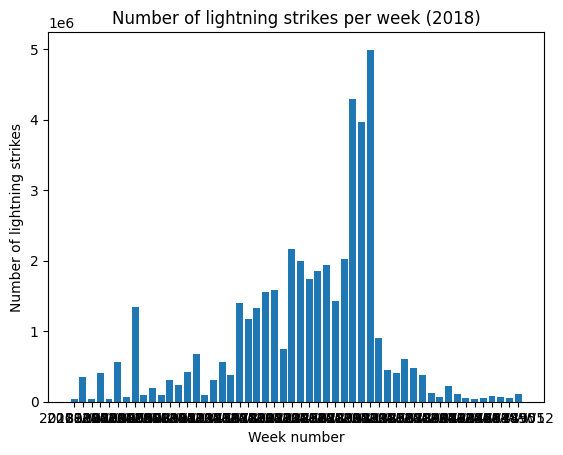

In [26]:
plt.bar(x = df_by_week_2018['week'], height = df_by_week_2018['number_of_strikes'])
plt.xlabel("Week number")
plt.ylabel("Number of lightning strikes")
plt.title("Number of lightning strikes per week (2018)")
plt.show()


### Adjust the Graph Size
The x-axis labels are not clearly visible, so I will increase the figure size and adjust the label rotation and font size to make the chart easier to read.

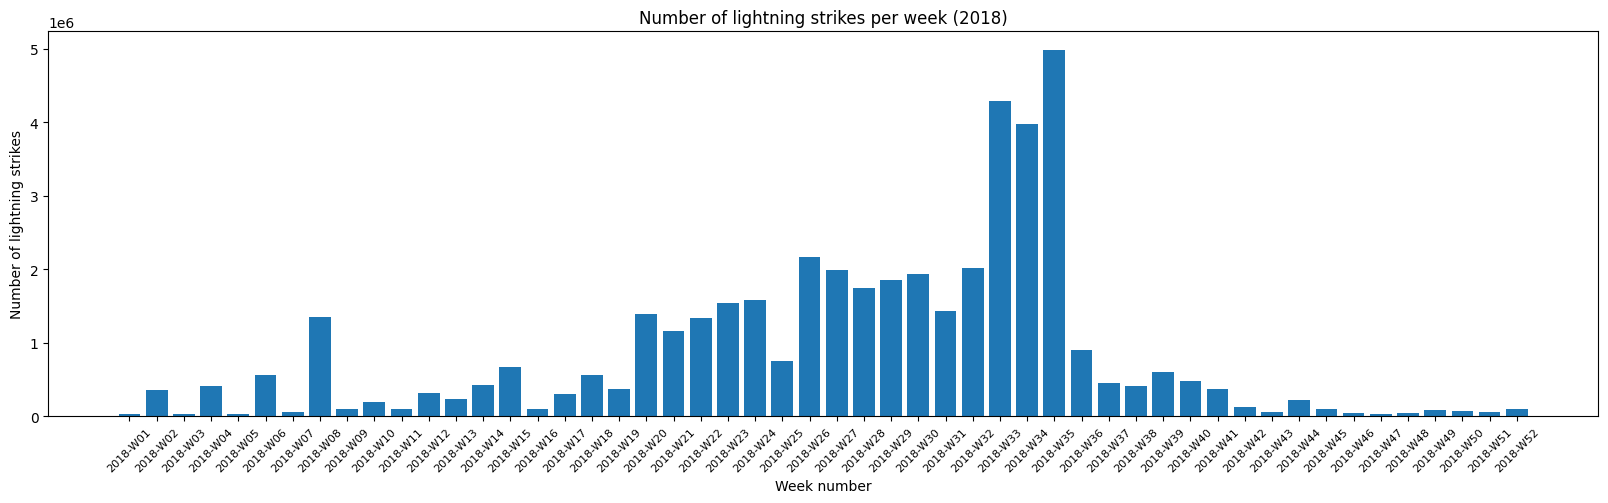

In [27]:
plt.figure(figsize = (20, 5)) # Increase output size.
plt.bar(x = df_by_week_2018['week'], height = df_by_week_2018['number_of_strikes'])
plt.xlabel("Week number")
plt.ylabel("Number of lightning strikes")
plt.title("Number of lightning strikes per week (2018)")
plt.xticks(rotation = 45, fontsize = 8) # Rotate x-axis labels and decrease font size.
plt.show()


### Plot the Number of Quarterly Lightning Strikes from 2016–2018
Next, I will plot the total number of lightning strikes for each quarter from 2016 to 2018. To make the numbers easier to read, I will express them in millions.

In [28]:
df_by_quarter = df['number_of_strikes'].div(1000000)
df_by_quarter.head()


0    0.000016
1    0.000016
2    0.000016
3    0.000016
4    0.000016
Name: number_of_strikes, dtype: float64

To make the data more informative, I will round the values and append the "M" symbol to represent millions:


In [29]:
df_by_quarter = df.groupby(['quarter']).sum(numeric_only=True).reset_index()
df_by_quarter['number_of_strikes_formatted'] = df_by_quarter['number_of_strikes'].div(1000000).round(1).astype(str) + 'M'
df_by_quarter.head()


,quarter,number_of_strikes,number_of_strikes_formatted
0,2016-Q1,2683798,2.7M
1,2016-Q2,15084857,15.1M
2,2016-Q3,21843820,21.8M
3,2016-Q4,1969754,2.0M
4,2017-Q1,2444279,2.4M


### Add Labels to the Bars
To make the graph clearer, I will write a function that adds labels above each bar to show the number of strikes in millions:



In [30]:
def addlabels(x, y, labels):
    '''
    Iterates over data and plots text labels above each bar of bar graph.
    '''
    for i in range(len(x)):
        plt.text(i, y[i], labels[i], ha = 'center', va = 'bottom')

Now, I can plot the graph:



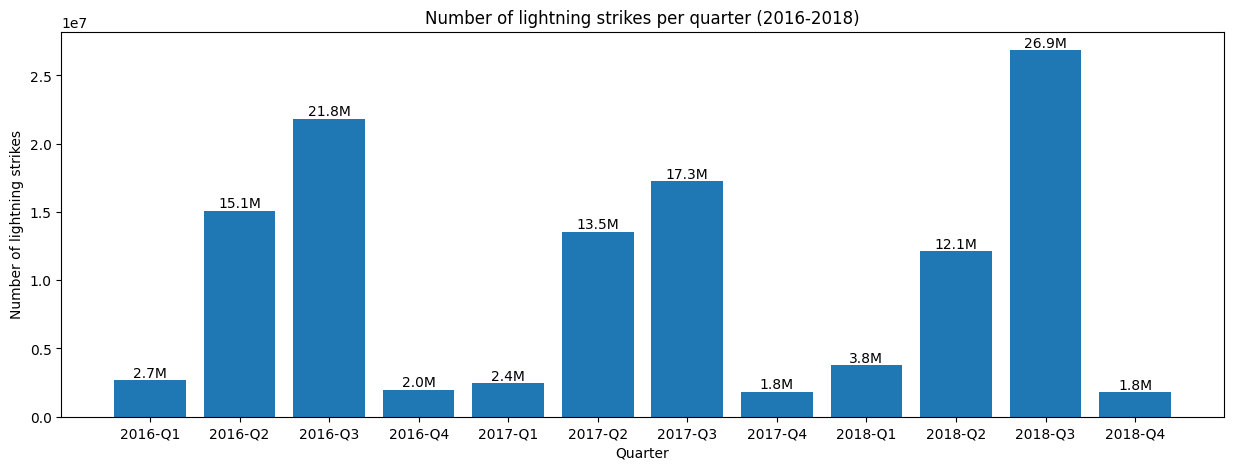

In [31]:
plt.figure(figsize = (15, 5))
plt.bar(x = df_by_quarter['quarter'], height = df_by_quarter['number_of_strikes'])
addlabels(df_by_quarter['quarter'], df_by_quarter['number_of_strikes'], df_by_quarter['number_of_strikes_formatted'])
plt.xlabel('Quarter')
plt.ylabel('Number of lightning strikes')
plt.title('Number of lightning strikes per quarter (2016-2018)')
plt.show()


### Create a Grouped Bar Chart
To compare year-over-year lightning strikes more easily, I will create a grouped bar chart. I will split the quarter column into separate quarter_number and year columns for the purpose of this chart.

In [32]:
df_by_quarter['quarter_number'] = df_by_quarter['quarter'].str[-2:]
df_by_quarter['year'] = df_by_quarter['quarter'].str[:4]
df_by_quarter.head()


,quarter,number_of_strikes,number_of_strikes_formatted,quarter_number,year
0,2016-Q1,2683798,2.7M,Q1,2016
1,2016-Q2,15084857,15.1M,Q2,2016
2,2016-Q3,21843820,21.8M,Q3,2016
3,2016-Q4,1969754,2.0M,Q4,2016
4,2017-Q1,2444279,2.4M,Q1,2017


Now, I can plot the grouped bar chart using seaborn:


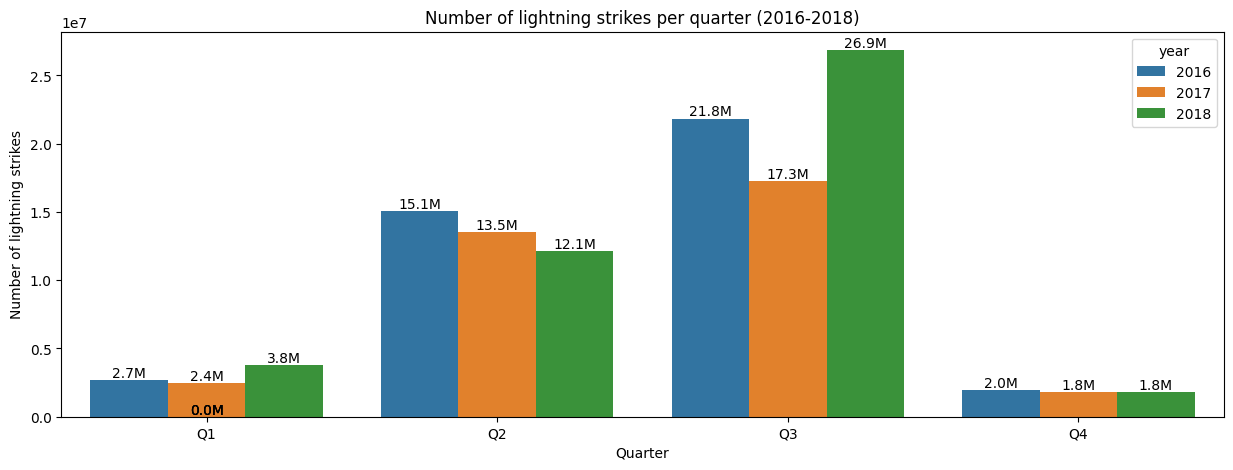

In [33]:
plt.figure(figsize = (15, 5))
p = sns.barplot(
    data = df_by_quarter,
    x = 'quarter_number',
    y = 'number_of_strikes',
    hue = 'year')
for b in p.patches:
    p.annotate(str(round(b.get_height()/1000000, 1))+'M', 
               (b.get_x() + b.get_width() / 2., b.get_height() + 1.2e6), 
               ha = 'center', va = 'bottom', 
               xytext = (0, -12), 
               textcoords = 'offset points')
plt.xlabel("Quarter")
plt.ylabel("Number of lightning strikes")
plt.title("Number of lightning strikes per quarter (2016-2018)")
plt.show()
